# Week 7

HW for Week 8: Read Ch6.

# Examples of Bayesian Parameter Estimation
   
   
## Unknown errors & small datasets
See Figure (5.4), Equation (5.58) for the log posterior for parameters of a Gaussian dist. estimated from data with unknown errors.

Note that in the case of small number of data, it may be a bad idea to model the underlying prior by a Gaussian -- can lead to biases in variance. In these cases, it may be better to use a Students' t-dist.

Figure (5.5) indicates that if we have a small dataset, even bootstrapping/jackknifing can significantly under-estimate the variance, even if it gets the mean correct.
**Be careful when fitting data with $N_{data} < 100$ when variances are unknown**

Figure (5.6) shows a drawing of samples from a Gaussian with heteroscedastic errors. It ends up being non-Gaussian (though may look Gaussian), and the posterior becomes very obviously skewed. 

**Hence the superposition of Gaussians is not itself Gaussian!**

Table (5.1) is a useful reference, shows a summary of results for estimating parameters when data have some Gaussian error distribution.

## How binning affects regression

_Is it a good idea to bin data when doing linear regression?_

Fig (5.14) shows an example of doing linear regression on unbinned data, larger subsets of the data show better results.

Fig (5.15) shows an example of linear regression on binned data. Too many bins causes Poisson errors from small sample per bin. Note that too few bins can cause additional biases, as seen in Fig (5.16).

**Best to analyze data unbinned, but binned with Poisson errors is OK if the uncertainties are ~smaller than the bin-width**

## How to "throw out" bad data points

Can use Bayesian analysis to estimate probability that each data point is an outlier, potentially to be thrown out.

Start with a likelihood:

$$
p(x_i\,\vert\,\mu, \sigma_i, g_i, I) = g_i p_{\text{good}
}(x_i\,\vert\,\mu, \sigma_i) + (1-g_i)p_{\text{bad}}(x_i\,\vert\,\mu, I).
$$

Here suppose if a data point is good (bad) $g_i = 1 (0)$. Then, marginalizing over all $g_i$, we get Fig (5.17).

# Bayesian Model Selection

## Gaussian or Lorentzian?

Fig (5.19) shows the odds ratio for a Gaussian vs Cauchy/Lorentzian distribution. When the sample value hits a large outlier, the odds ratio swings far toward the Cauchy model.

## Knuth's Rule for histograms

Knuth's rule comes from a Bayesian perspective, and provides a (slightly more) robust histogram binning scheme even for multimodal distributions where Scott's and Freedman-Diaconis may fail.

## Varying bin widths

Bayesian blocks finds optimal histogram with varying bin widths, Fig (5.21), allowing larger bin widths in the outskirts and tighter bins in the centers.

# Numerical Methods

The traditional computation of the likelihood/posterior is on a grid for each parameter (assume the same for each parameter for now). The grid size is then $N_{grid}^{N_{param}}$, which gets prohibitively big as the number of parameters increases, or yields poor parameter estimates as the grid shrinks.

The general case of what we are handling is evaluating a multidimensional integral,
$$
I(\theta) = \int g(\theta)p(\theta)d\theta
$$

Here are a few frequently encountered problems:
1. Marginalization - integrate over nuisance parameters with $g=1$. Posterior mean of $\theta_m$, $g(\theta) = \theta_m$, integrate over all other parameters.
3. Model comparison - $g(\theta) = 1$, but $p(\theta)$ must be properly normalized.

Simple integration methods include generic Monte Carlo, though it fails in high dimensions. 

$$
    I \sim \frac{V_\theta}{M}\sum g(\theta_j)p(\theta_j).
$$

We can account for this using Markov Chains:

**Markov Chain** - A sequence of random variables from a k-dimensional parameter space where $\vec{\Theta}_{i+1}$ depends only on $\vec{\Theta}_{i}$.

**MCMC** (Markov Chain Monte Carlo) - Choose a random "chain" of points in the parameter space with a distribution proportional to $p(\theta)$. For M points in our chain,

$$
    I \sim \frac{1}{M}\sum g(\theta_j).
$$

and the expectation value of parameter $1$ would be

$$
    \left<\Theta_1\right> = \frac{1}{M}\sum \Theta_{1,j}
$$

_A good practice is to run a grid-search before running an MCMC to better understand your problem, since the MCMC will likely be a black box_

Fig (5.22) shows MCMC estimates for $M=10,000$ for Cauchy distribution vs grid-based results.

## Metropolis-Hastings (MCMC Algorithm)

Adds an artibrary function to the original Metropolis algorithm:
1. Choose $\vec{\Theta}_{i+1}$ for possible acceptance within some radius of current location.

2. If $p(\vec{\Theta}_{i+1}) > p(\vec{\Theta}_{i})$, make a jump
3. Else, make the jump with probability
$$
    p(\vec{\Theta}_{i+1}) / p(\vec{\Theta}_{i})
$$

Achieves goal of chain dist $\propto p(\vec{\Theta})$, random-walks away from local optima, but doesn't handle multimodal pdf's well.

Typical methods include allowing a roughly $10,000$ step MCMC "burn-in" that should be discarded, for the optimizer to begin tracing the distribution. Should really run several chains from different starting points and compare variances. The burn-in can be arbitrarily large as long as the optimizer is allowed to run longer, otherwise it may not trace the full parameter space.

It's also possible to tune the step radius, though black-box MCMC codes will handle all this for you (for better or for worse).

Fig (5.23) shows posteriors for a single and double Gaussian fit to a Gaussian mixture model.

Fig (5.24) is comparison of odds ratios.

Fig (5.25) is an MCMC posterior for a Gaussian with heteroscedastic errors.

Fig (5.26) shows an MCMC fitting for an emission line (Gaussian) and continuum (uniform).

Section (5.9) is a summary of pros and cons of Classical vs Bayesian methods.

# Hack

In [103]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, anderson, t
from astroML.stats import mean_sigma, median_sigmaG

## Original Plot

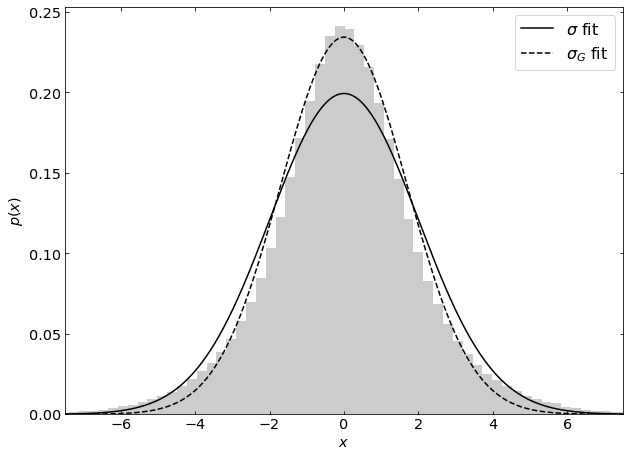

In [34]:
np.random.seed(0)
Npts = int(1e6)
x = np.random.normal(loc=0, scale=1, size=Npts)

# add error for each point
e = 3 * np.random.random(Npts)
x += np.random.normal(0, e)

# compute point statistics
mu_sample, sig_sample = mean_sigma(x, ddof=1)
med_sample, sigG_sample = median_sigmaG(x)

#------------------------------------------------------------
# plot the results
fig, ax = plt.subplots(figsize=(10, 7.5))
ax.hist(x, 100, histtype='stepfilled', alpha=0.2,
        color='k', normed=True)

# plot the fitting normal curves
x_sample = np.linspace(-15, 15, 1000)
ax.plot(x_sample, norm(mu_sample, sig_sample).pdf(x_sample),
        '-k', label='$\sigma$ fit')
ax.plot(x_sample, norm(med_sample, sigG_sample).pdf(x_sample),
        '--k', label='$\sigma_G$ fit')
ax.legend(fontsize=16)

ax.set_xlim(-7.5, 7.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()

## Errors distribution width equal to sigma

0.0016613981381590878


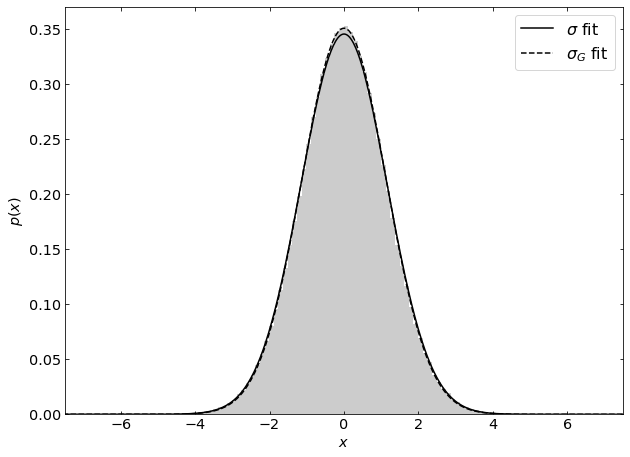

In [40]:
np.random.seed(0)
Npts = int(1e6)
x = np.random.normal(loc=0, scale=1, size=Npts)

# add error for each point
e = 1 * np.random.random(Npts)
x += np.random.normal(0, e)

# compute point statistics
mu_sample, sig_sample = mean_sigma(x, ddof=1)
med_sample, sigG_sample = median_sigmaG(x)
print(mu_sample)

#------------------------------------------------------------
# plot the results
fig, ax = plt.subplots(figsize=(10, 7.5))
ax.hist(x, 100, histtype='stepfilled', alpha=0.2,
        color='k', normed=True)

# plot the fitting normal curves
x_sample = np.linspace(-15, 15, 1000)
ax.plot(x_sample, norm(mu_sample, sig_sample).pdf(x_sample),
        '-k', label='$\sigma$ fit')
ax.plot(x_sample, norm(med_sample, sigG_sample).pdf(x_sample),
        '--k', label='$\sigma_G$ fit')
ax.legend(fontsize=16)

ax.set_xlim(-7.5, 7.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()

## Homoscedastic Errors

0.0018165962328959152


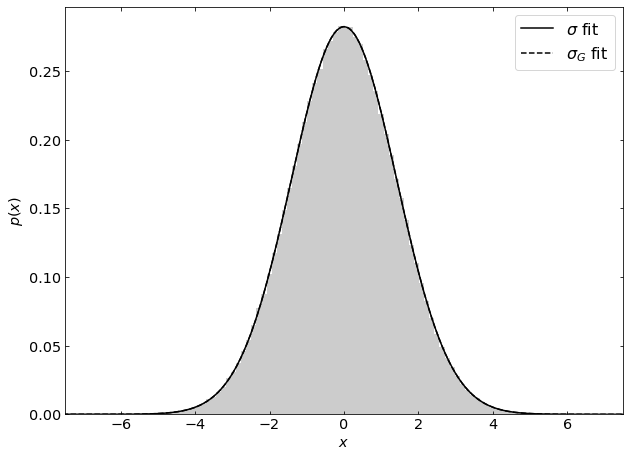

In [39]:
np.random.seed(0)
Npts = int(1e6)
x = np.random.normal(loc=0, scale=1, size=Npts)

# add error for each point
x += np.random.normal(0, 1, size=Npts)

# compute point statistics
mu_sample, sig_sample = mean_sigma(x, ddof=1)
med_sample, sigG_sample = median_sigmaG(x)
print(mu_sample)

#------------------------------------------------------------
# plot the results
fig, ax = plt.subplots(figsize=(10, 7.5))
ax.hist(x, 100, histtype='stepfilled', alpha=0.2,
        color='k', normed=True)

# plot the fitting normal curves
x_sample = np.linspace(-15, 15, 1000)
ax.plot(x_sample, norm(mu_sample, sig_sample).pdf(x_sample),
        '-k', label='$\sigma$ fit')
ax.plot(x_sample, norm(med_sample, sigG_sample).pdf(x_sample),
        '--k', label='$\sigma_G$ fit')
ax.legend(fontsize=16)

ax.set_xlim(-7.5, 7.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()

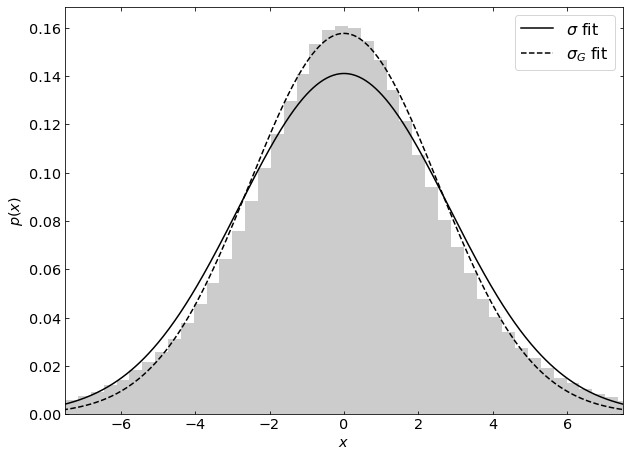

In [147]:
np.random.seed(0)
Npts = int(1e6)
x = np.random.normal(loc=0, scale=1, size=Npts)

# add error for each point
e = 3 * np.random.random(Npts) + 1
x += np.random.normal(0, e)

# compute point statistics
mu_sample, sig_sample = mean_sigma(x, ddof=1)
med_sample, sigG_sample = median_sigmaG(x)

#------------------------------------------------------------
# plot the results
fig, ax = plt.subplots(figsize=(10, 7.5))
ax.hist(x, 100, histtype='stepfilled', alpha=0.2,
        color='k', normed=True)

# plot the fitting normal curves
x_sample = np.linspace(-15, 15, 1000)
ax.plot(x_sample, norm(mu_sample, sig_sample).pdf(x_sample),
        '-k', label='$\sigma$ fit')
ax.plot(x_sample, norm(med_sample, sigG_sample).pdf(x_sample),
        '--k', label='$\sigma_G$ fit')
ax.legend(fontsize=16)

ax.set_xlim(-7.5, 7.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()